In [1]:
import random 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline


In [47]:
train = pd.read_csv('C:\\Users\\vedan\\Desktop\\ML ASSIGNMENT\\unsupervised\\train.csv')
train1=train
test = pd.read_csv('C:\\Users\\vedan\\Desktop\\ML ASSIGNMENT\\unsupervised\\test.csv')

In [3]:
train.columns

Index(['rn', 'activity', 'tBodyAcc.mean.X', 'tBodyAcc.mean.Y',
       'tBodyAcc.mean.Z', 'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z',
       'tBodyAcc.mad.X', 'tBodyAcc.mad.Y',
       ...
       'fBodyBodyGyroJerkMag.meanFreq', 'fBodyBodyGyroJerkMag.skewness',
       'fBodyBodyGyroJerkMag.kurtosis', 'angle.tBodyAccMean.gravity',
       'angle.tBodyAccJerkMean.gravityMean', 'angle.tBodyGyroMean.gravityMean',
       'angle.tBodyGyroJerkMean.gravityMean', 'angle.X.gravityMean',
       'angle.Y.gravityMean', 'angle.Z.gravityMean'],
      dtype='object', length=563)

In [4]:
print('Shape of the train set: ' + str(train.shape))
print('Shape of the test set: ' + str(test.shape))

Shape of the train set: (3609, 563)
Shape of the test set: (1541, 562)


In [5]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ',sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


In [6]:
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in test : ', test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in test :  0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

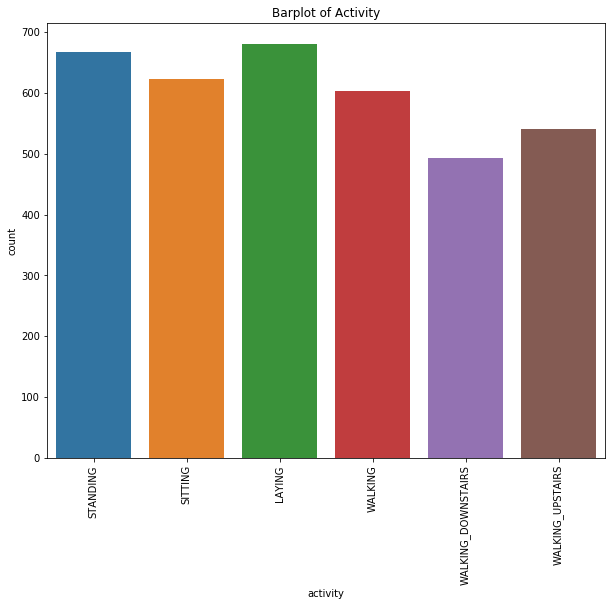

In [7]:
#checking for class imbalance
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train.activity)
plt.xticks(rotation=90)

**Static and dynamic activities :
SITTING, STANDING, LAYING can be considered as static activities with no motion involved
WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved
 tBodyAccMag-mean() feature used to differentiate among these two broader set of activities.
 robability density function(PDF) is very helpful to assess importance of a continuous variable.**

Text(0.1, 9, 'Dynamic Activities')

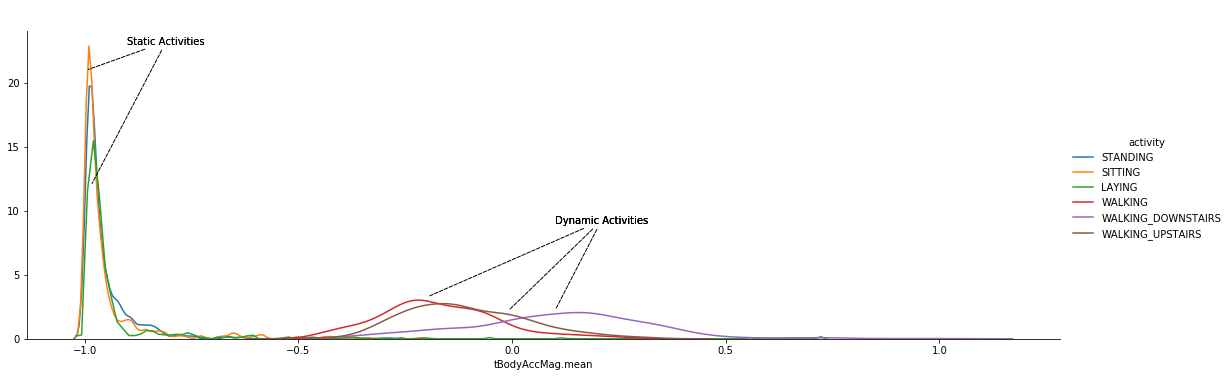

In [8]:
facetgrid = sns.FacetGrid(train, hue='activity', height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag.mean', hist=False).add_legend()
plt.annotate("Static Activities", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-.999,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

**closer view on the PDFs of each activity under static and dynamic categorization**

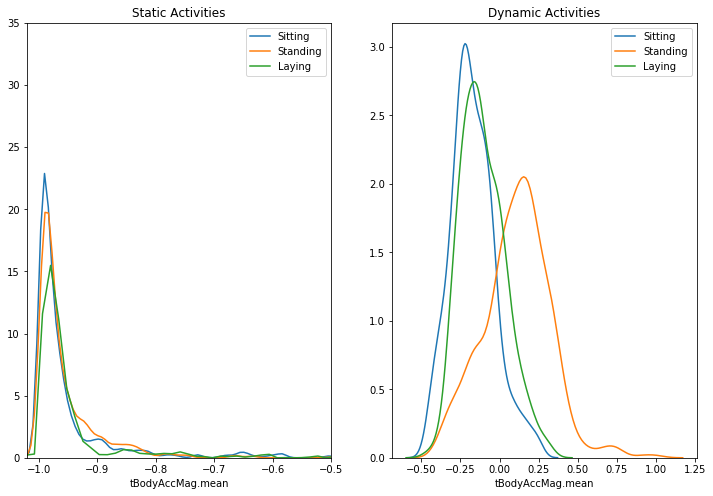

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(train[train["activity"]=="SITTING"]['tBodyAccMag.mean'],hist = False, label = 'Sitting')
sns.distplot(train[train["activity"]=="STANDING"]['tBodyAccMag.mean'],hist = False,label = 'Standing')
sns.distplot(train[train["activity"]=="LAYING"]['tBodyAccMag.mean'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(train[train["activity"]=="WALKING"]['tBodyAccMag.mean'],hist = False, label = 'Sitting')
sns.distplot(train[train["activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag.mean'],hist = False,label = 'Standing')
sns.distplot(train[train["activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag.mean'],hist = False, label = 'Laying')


# **plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories.**

**tBodyAccMag-mean()<=-0.8------------->Static
tBodyAccMag-mean()>=-0.6------------->dynamic**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

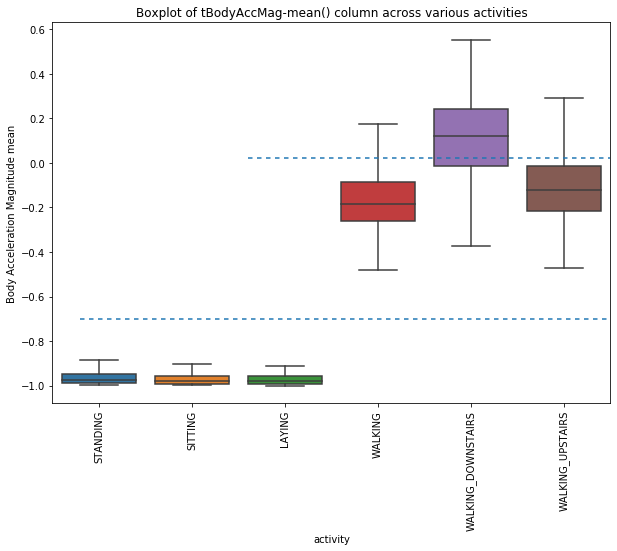

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='activity', y='tBodyAccMag.mean',data=train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)

# Analysing Angle between X-axis and gravityMean feature

**From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

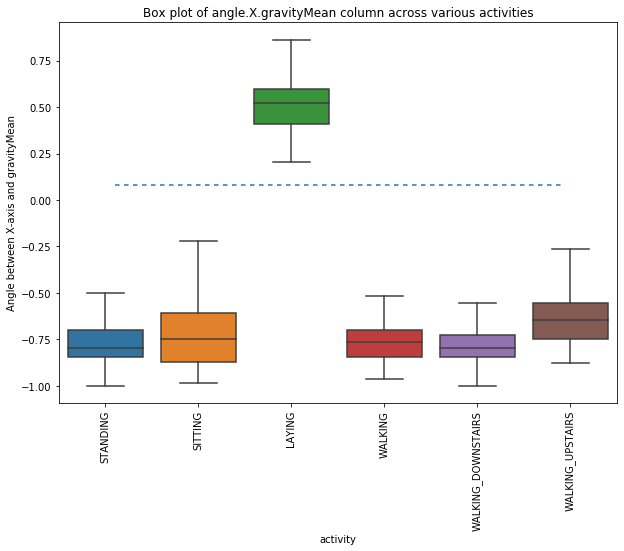

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='activity', y='angle.X.gravityMean', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle.X.gravityMean column across various activities')
plt.xticks(rotation = 90)

**Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.**

In [12]:
from sklearn.manifold import TSNE

In [13]:
X_for_tsne = train.drop(['rn', 'activity'], axis=1)

In [14]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3609 samples in 0.078s...
[t-SNE] Computed neighbors for 3609 samples in 8.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3609
[t-SNE] Computed conditional probabilities for sample 2000 / 3609
[t-SNE] Computed conditional probabilities for sample 3000 / 3609
[t-SNE] Computed conditional probabilities for sample 3609 / 3609
[t-SNE] Mean sigma: 1.502022
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.530914
[t-SNE] KL divergence after 1000 iterations: 1.166608


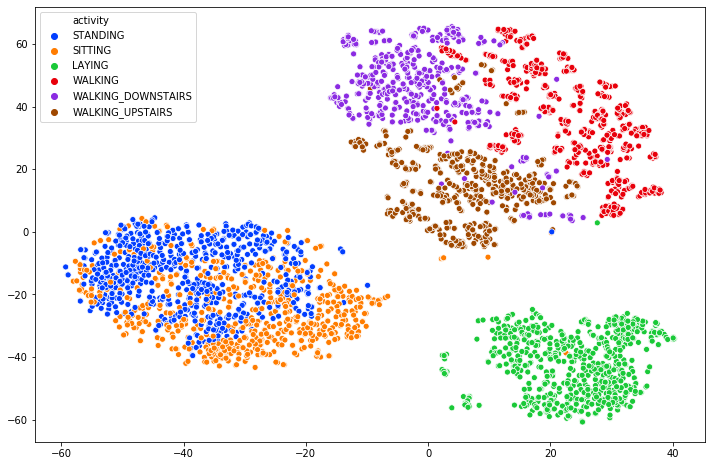

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["activity"],palette="bright")

# k-means

In [16]:
Labels = train['activity']
train = train.drop(['rn', 'activity'], axis = 1)
test = test.drop(['rn'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [17]:
#normalize the dataset
scaler = StandardScaler()
train = scaler.fit_transform(train)

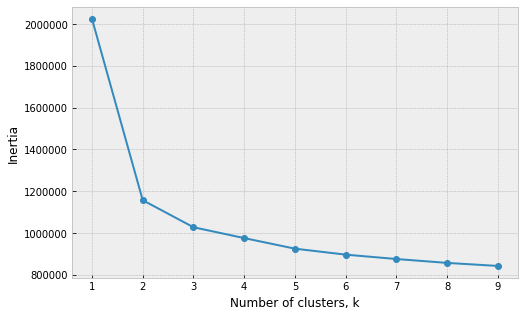

In [18]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(train)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [19]:
def k_means(n_clust, data_frame, true_labels):
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    #y_clust_1 = k_means.predict(test)
    display(ct)

In [20]:
k_means(n_clust=2, data_frame=train, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


In [21]:
k_means(n_clust=6, data_frame=train, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,554,21,0,0,0,0
1,0,0,0,248,311,97
2,1,0,0,329,107,438
3,20,445,479,0,0,0
4,0,0,0,26,75,4
5,106,157,189,0,0,2


In [22]:
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
Labels_binary = np.array(Labels_binary.astype(int))

In [23]:
k_means(n_clust=2, data_frame=train, true_labels=Labels_binary)

orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


# **PCA**

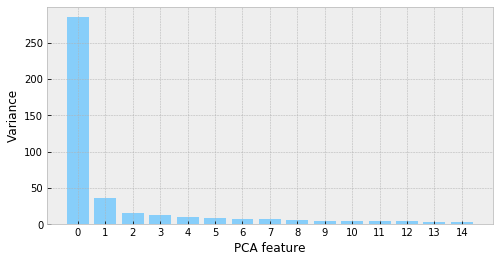

In [24]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(train)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [25]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(train)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [26]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1971,8
1,1,1629


In [27]:
pca_transform(n_comp=2)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 2)


orig_label,0,1
clust_label,,
0,1969,6
1,3,1631


# **Hierarchical Clustering**


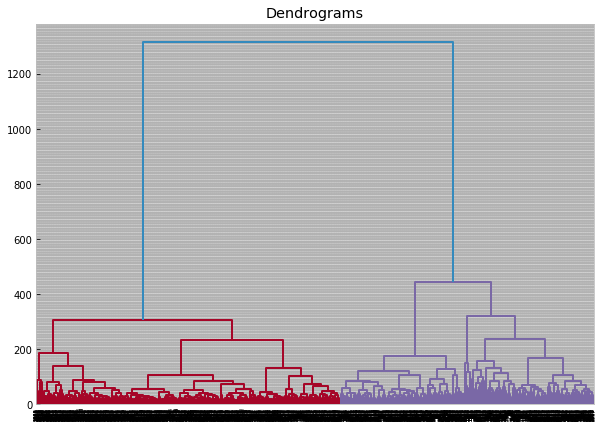

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(train, method='ward'))

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
hc.fit(train)
c_labels = hc.labels_
df = pd.DataFrame({'clust_label': c_labels, 'orig_label': Labels.tolist()})
ct = pd.crosstab(df['clust_label'], df['orig_label'])
y_clust = hc.fit_predict(train)
display(ct)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,559,437,407,0,0,0
1,121,186,261,0,0,0
2,1,0,0,242,76,487
3,0,0,0,0,40,0
4,0,0,0,225,243,36
5,0,0,0,136,134,18


# TEST DATA


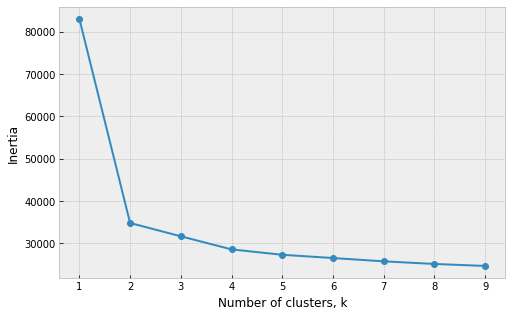

In [30]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(test)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

**2- CLUSTERS**

In [31]:
k_means = KMeans(n_clusters = 2, random_state=123, n_init=30)
k_means.fit(test)
c_labels = k_means.labels_
y_clust = k_means.predict(test)
print(y_clust)
test['cluster_k_means']=y_clust
print(test)

[1 1 1 ... 0 0 0]
      tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  tBodyAcc.std.X  \
0               0.280         -0.01950          -0.1130         -0.9950   
1               0.277         -0.01660          -0.1150         -0.9980   
2               0.277         -0.02180          -0.1210         -0.9970   
3               0.279         -0.01480          -0.1170         -0.9970   
4               0.279         -0.01450          -0.1070         -0.9980   
...               ...              ...              ...             ...   
1536            0.289         -0.02810          -0.0943         -0.0623   
1537            0.377         -0.01810          -0.1100         -0.3140   
1538            0.253         -0.02490          -0.1700         -0.3080   
1539            0.277          0.00108          -0.0740         -0.0685   
1540            0.192         -0.03360          -0.1060         -0.3550   

      tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  tBodyAcc.mad.Y  \
0        

In [32]:
k_means.cluster_centers_

array([[ 0.27332564, -0.01963102, -0.11027506, ..., -0.72086182,
         0.23169051,  0.07847158],
       [ 0.27790691, -0.01672017, -0.10833092, ..., -0.30261144,
        -0.08169381, -0.16577687]])

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc1.fit_predict(test)
print(Y_hc)
test['cluster_h1']=Y_hc
print(test)

[0 4 0 ... 3 5 3]
      tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  tBodyAcc.std.X  \
0               0.280         -0.01950          -0.1130         -0.9950   
1               0.277         -0.01660          -0.1150         -0.9980   
2               0.277         -0.02180          -0.1210         -0.9970   
3               0.279         -0.01480          -0.1170         -0.9970   
4               0.279         -0.01450          -0.1070         -0.9980   
...               ...              ...              ...             ...   
1536            0.289         -0.02810          -0.0943         -0.0623   
1537            0.377         -0.01810          -0.1100         -0.3140   
1538            0.253         -0.02490          -0.1700         -0.3080   
1539            0.277          0.00108          -0.0740         -0.0685   
1540            0.192         -0.03360          -0.1060         -0.3550   

      tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  tBodyAcc.mad.Y  \
0        

In [34]:
test['cluster_h1'].value_counts()

0    365
3    352
2    287
4    186
5    181
1    170
Name: cluster_h1, dtype: int64

**6-CLUSTERS**

In [35]:
k_means = KMeans(n_clusters = 6, random_state=123, n_init=30)
k_means.fit(test)
c_labels = k_means.labels_
y_clust = k_means.predict(test)
print(y_clust)
test['cluster_k_means_6']=y_clust
print(test)

[5 1 5 ... 0 2 0]
      tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  tBodyAcc.std.X  \
0               0.280         -0.01950          -0.1130         -0.9950   
1               0.277         -0.01660          -0.1150         -0.9980   
2               0.277         -0.02180          -0.1210         -0.9970   
3               0.279         -0.01480          -0.1170         -0.9970   
4               0.279         -0.01450          -0.1070         -0.9980   
...               ...              ...              ...             ...   
1536            0.289         -0.02810          -0.0943         -0.0623   
1537            0.377         -0.01810          -0.1100         -0.3140   
1538            0.253         -0.02490          -0.1700         -0.3080   
1539            0.277          0.00108          -0.0740         -0.0685   
1540            0.192         -0.03360          -0.1060         -0.3550   

      tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  tBodyAcc.mad.Y  \
0        

In [36]:
from sklearn.cluster import AgglomerativeClustering
#hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(test)
print(Y_hc)
test['cluster_h_6']=y_clust
print(test)

[2 4 2 ... 3 5 3]
      tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  tBodyAcc.std.X  \
0               0.280         -0.01950          -0.1130         -0.9950   
1               0.277         -0.01660          -0.1150         -0.9980   
2               0.277         -0.02180          -0.1210         -0.9970   
3               0.279         -0.01480          -0.1170         -0.9970   
4               0.279         -0.01450          -0.1070         -0.9980   
...               ...              ...              ...             ...   
1536            0.289         -0.02810          -0.0943         -0.0623   
1537            0.377         -0.01810          -0.1100         -0.3140   
1538            0.253         -0.02490          -0.1700         -0.3080   
1539            0.277          0.00108          -0.0740         -0.0685   
1540            0.192         -0.03360          -0.1060         -0.3550   

      tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  tBodyAcc.mad.Y  \
0        

# PCA-TEST


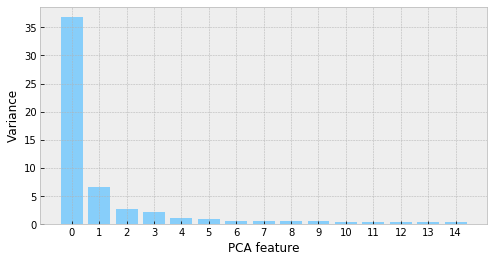

In [37]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(test)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [38]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced_test
    Data_reduced_test = pca.fit_transform(test)
    print('Shape of the new Data df: ' + str(Data_reduced_test.shape))

In [39]:
pca_transform(n_comp=1)
k_means.fit(Data_reduced_test)
c_labels = k_means.labels_
y_clust = k_means.predict(Data_reduced_test)
print(y_clust)
test['cluster_k_means_pca']=y_clust
print(test)

Shape of the new Data df: (1541, 1)
[3 0 3 ... 5 5 2]
      tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  tBodyAcc.std.X  \
0               0.280         -0.01950          -0.1130         -0.9950   
1               0.277         -0.01660          -0.1150         -0.9980   
2               0.277         -0.02180          -0.1210         -0.9970   
3               0.279         -0.01480          -0.1170         -0.9970   
4               0.279         -0.01450          -0.1070         -0.9980   
...               ...              ...              ...             ...   
1536            0.289         -0.02810          -0.0943         -0.0623   
1537            0.377         -0.01810          -0.1100         -0.3140   
1538            0.253         -0.02490          -0.1700         -0.3080   
1539            0.277          0.00108          -0.0740         -0.0685   
1540            0.192         -0.03360          -0.1060         -0.3550   

      tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAc

In [40]:
Y_hc = hc.fit_predict(Data_reduced_test)
print(Y_hc)
test['cluster_h_6_pca']=y_clust
print(test)

[3 1 3 ... 0 0 4]
      tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  tBodyAcc.std.X  \
0               0.280         -0.01950          -0.1130         -0.9950   
1               0.277         -0.01660          -0.1150         -0.9980   
2               0.277         -0.02180          -0.1210         -0.9970   
3               0.279         -0.01480          -0.1170         -0.9970   
4               0.279         -0.01450          -0.1070         -0.9980   
...               ...              ...              ...             ...   
1536            0.289         -0.02810          -0.0943         -0.0623   
1537            0.377         -0.01810          -0.1100         -0.3140   
1538            0.253         -0.02490          -0.1700         -0.3080   
1539            0.277          0.00108          -0.0740         -0.0685   
1540            0.192         -0.03360          -0.1060         -0.3550   

      tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  tBodyAcc.mad.Y  \
0        

In [44]:
from apyori import apriori

In [49]:
data = pd.read_csv('C:\\Users\\vedan\\Desktop\\ML ASSIGNMENT\\unsupervised\\my_movies.csv')

In [51]:
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [55]:
records = []
for i in range(len(data)):
    records.append([str(data.values[i,j]) for j in range(0, 15)])

In [56]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [59]:
print(len(association_results))

112


In [61]:
print(association_results[0])

RelationRecord(items=frozenset({'Green Mile', 'LOTR'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)])


In [70]:
df= pd.DataFrame(columns=["Rule1","Rule2","Support","Confidence","Lift"])

for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    
    #second index of the inner list
    print("Support: " + str(item[1]))
    
    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    df = df.append({'Rule1' : items[0], 'Rule2' : items[1], 'Support' : item[1], 'Confidence' : item[2][0][2], 'Lift' : item[2][0][3]},  ignore_index = True) 
    print("=====================================")

Rule: Green Mile -> LOTR
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: Harry Potter1 -> Harry Potter2
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: LOTR1 -> LOTR2
Support: 0.2
Confidence: 1.0
Lift: 5.0
Rule: 0 -> Green Mile
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: 0 -> Harry Potter1
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: 0 -> LOTR2
Support: 0.2
Confidence: 1.0
Lift: 5.0
Rule: 1 -> Green Mile
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: 1 -> Harry Potter1
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: 1 -> LOTR1
Support: 0.2
Confidence: 1.0
Lift: 5.0
Rule: Gladiator -> Green Mile
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: LOTR1 -> Green Mile
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: Green Mile -> Harry Potter1
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: Green Mile -> Harry Potter1
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: Green Mile -> LOTR
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: Green Mile -> LOTR
Support: 0.1
Confidence: 0.5
Lift: 5.0
Rule: LOTR1 -> Green Mile
Supp

In [71]:
df

,Rule1,Rule2,Support,Confidence,Lift
0,Green Mile,LOTR,0.1,0.5,5.0
1,Harry Potter1,Harry Potter2,0.1,0.5,5.0
2,LOTR1,LOTR2,0.2,1.0,5.0
3,0,Green Mile,0.1,0.5,5.0
4,0,Harry Potter1,0.1,0.5,5.0
...,...,...,...,...,...
107,0,LOTR2,0.1,0.5,5.0
108,1,nan,0.1,0.5,5.0
109,1,LOTR2,0.1,0.5,5.0
110,1,0,0.1,0.5,5.0


In [76]:
df1=df.sort_values(['Confidence', 'Lift'], ascending=False)
df1.head()

,Rule1,Rule2,Support,Confidence,Lift
2,LOTR1,LOTR2,0.2,1.0,5.0
5,0,LOTR2,0.2,1.0,5.0
8,1,LOTR1,0.2,1.0,5.0
26,1,0,0.2,1.0,5.0
0,Green Mile,LOTR,0.1,0.5,5.0
